decay done, took: 1.8461670875549316 seconds
axion done, took: 0.18226146697998047 seconds


/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:107: RuntimeWarning: divide by zero encountered in true_divide
  rho0 * (decay_const * rho_phi_prime - 4*H*rho_R_prime) / (np.pi**2/30*g_star * 4 * T**3))
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:107: RuntimeWarning: divide by zero encountered in double_scalars
  rho0 * (decay_const * rho_phi_prime - 4*H*rho_R_prime) / (np.pi**2/30*g_star * 4 * T**3))


trans done, took: 1.3544139862060547 seconds


/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:94: RuntimeWarning: overflow encountered in power
  rho_phi_prime = a**(-3) * x
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:94: RuntimeWarning: invalid value encountered in multiply
  rho_phi_prime = a**(-3) * x
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:95: RuntimeWarning: overflow encountered in power
  rho_R_prime = a**(-4) * (y - x)


NameError: name 'Gamma_a_const' is not defined

<Figure size 432x288 with 0 Axes>

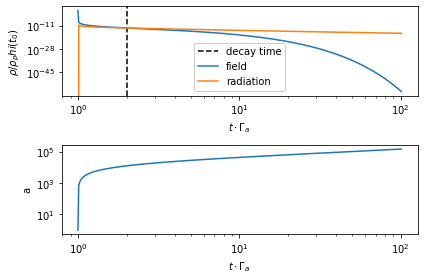

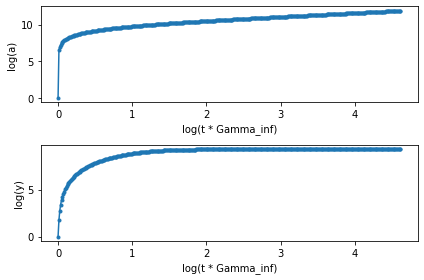

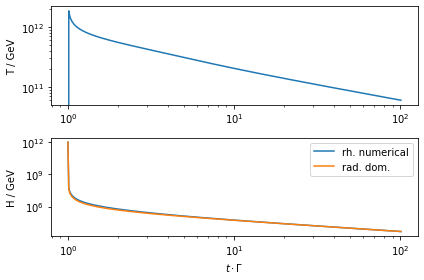

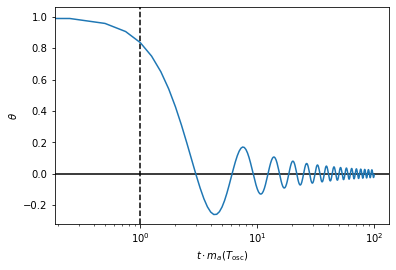

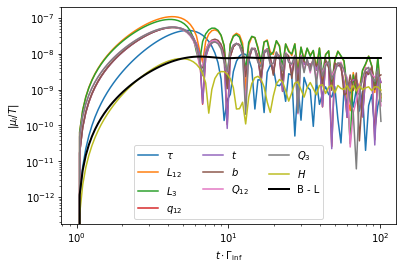

In [33]:
%run test.py
test(1e12, 1e6, 1e6, 1e8, tmax_axion_time=100.0, axion_decay_time=100.0, debug=True)